In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("CarPrice_Assignment.csv")
print(data.head())
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

Mean Squared Error: 0.21517478006200597
R² Score: 0.8268919681723106
Mean Squared Error: 0.21517478006200597
R-squared Score: 0.8268919681723106
Model Coefficients:
Coefficients: [ 0.03705993  0.11233514  0.01464832  0.17740369  0.01916529  0.17549093
  0.2907574  -0.02476753 -0.08170123  0.00068096  0.10409284  0.03584661
 -0.03964902 -0.05122386 -0.01836881  0.02072451  0.02024526 -0.02081188
 -0.08488631 -0.01061316 -0.0923366  -0.03494949  0.06596911  0.21750238
  0.01464024 -0.10713011  0.06694731 -0.0176849   0.00187627  0.00947041
 -0.03808833 -0.15126962 -0.0784621   0.00073005 -0.02720618  0.00947041
 -0.00452777 -0.01584647  0.01836881 -0.01829658 -0.03326844 -0.04161679
 -0.01711464]
Intercept: [-0.01043126]


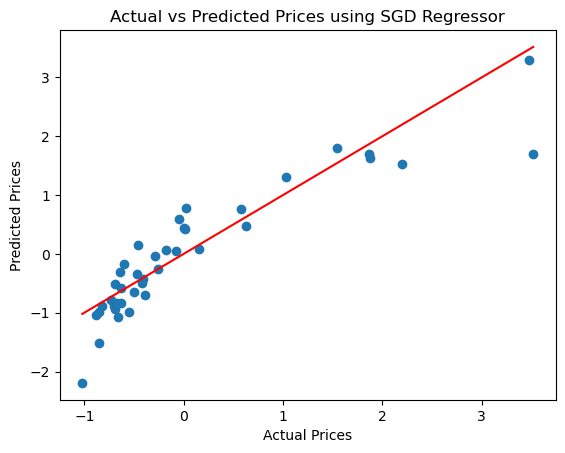

In [4]:
# Data preprocessing
# Dropping unnecessary columns and handling categorical variables
data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)

# Splitting the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

scaler = StandardScaler()
# Standardizing the data
#scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1, 1)).flatten()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the SGD Regressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

# Fitting the model on the training data
sgd_model.fit(X_train, y_train)

# Making predictions
y_pred = sgd_model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("="*50)
print("Mean Squared Error:", mse)
print("R² Score:", r2)
# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("="*50)

# Print model coefficients
print("Model Coefficients:")
print("Coefficients:", sgd_model.coef_)
print("Intercept:", sgd_model.intercept_)

# Visualizing actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices using SGD Regressor")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.show()